<a href="https://colab.research.google.com/github/Sowmi-miya/automl-ensemble-ml/blob/main/outputcame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"project1108","key":"83a9671c8966e62c8a6a039c2ebef5ab"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mahdavi1202/skin-cancer

Dataset URL: https://www.kaggle.com/datasets/mahdavi1202/skin-cancer
License(s): Attribution 4.0 International (CC BY 4.0)


In [ ]:
!mkdir -p /content/AutoPrognosis-Multimodal/data

In [ ]:
rm -rf /content/AutoPrognosis-Multimodal/data/


In [ ]:
!unzip skin-cancer.zip -d /content/AutoPrognosis-Multimodal/data

Archive:  skin-cancer.zip
  inflating: /content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1/PAT_100_393_595.png  
  inflating: /content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1/PAT_100_393_898.png  
  inflating: /content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1/PAT_101_1041_651.png  
  inflating: /content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1/PAT_101_1041_658.png  
  inflating: /content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1/PAT_101_1041_898.png  
  inflating: /content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1/PAT_104_1754_276.png  
  inflating: /content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1/PAT_104_1755_320.png  
  inflating: /content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1/PAT_104_1756_151.png  
  inflating: /content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1/PAT_106_158_249.png  
  inflating: /content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1/PAT_106_15

In [ ]:
!ls /content/AutoPrognosis-Multimodal/data

imgs_part_1  imgs_part_2  imgs_part_3  metadata.csv


## **Setup & Install Dependencies**

In [ ]:
!pip install numpy pandas scikit-learn tensorflow torch torchvision transformers optuna shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Data Preprocessing**

## **Load Tabular Data**

In [ ]:
import pandas as pd

# Load the metadata.csv file from the correct folder
df = pd.read_csv("AutoPrognosis-Multimodal/data/metadata.csv")

# Display the first few rows
df.head()


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True


## **Handle Missing Values**

In [ ]:
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Apply mean imputation for numeric columns
num_imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Apply most frequent imputation for categorical columns
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Check if missing values are handled
print(df.isnull().sum())


patient_id             0
lesion_id              0
smoke                  0
drink                  0
background_father      0
background_mother      0
age                    0
pesticide              0
gender                 0
skin_cancer_history    0
cancer_history         0
has_piped_water        0
has_sewage_system      0
fitspatrick            0
region                 0
diameter_1             0
diameter_2             0
diagnostic             0
itch                   0
grew                   0
hurt                   0
changed                0
bleed                  0
elevation              0
img_id                 0
biopsed                0
dtype: int64


### **Load Medical Images**

In [ ]:
import os
from PIL import Image
import torchvision.transforms as transforms

# Set correct image directory
image_dir = "AutoPrognosis-Multimodal/data/imgs_part_1/"  # Adjust as needed

# Check if directory exists
if not os.path.exists(image_dir):
    raise FileNotFoundError(f"Directory {image_dir} not found. Please check the path.")

# Get all image files from subdirectories
image_files = []
for root, dirs, files in os.walk(image_dir):  # Walk through all subdirectories
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filter only images
            image_files.append(os.path.join(root, file))

# Check if we found any images
if len(image_files) == 0:
    raise FileNotFoundError("No images found in the specified directory or subdirectories.")

# Load an example image
example_image_path = image_files[0]  # Pick the first image found
example_image = Image.open(example_image_path)

# Define transformations
image_size = (224, 224)  # Standard size for CNN models
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor()
])

# Apply transformation
example_tensor = transform(example_image)
print(example_tensor.shape)  # Should be (3, 224, 224)


torch.Size([4, 224, 224])


In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd

df = pd.read_csv('/content/AutoPrognosis-Multimodal/data/metadata.csv')  # Adjust the path


In [ ]:
df_filled = df.ffill()  # Use ffill() directly

In [ ]:
print(df.columns)


Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed'],
      dtype='object')


In [ ]:
X = df_filled.drop(columns=['biopsed'])  # Replace 'biopsed' with the actual label column
y = df_filled['biopsed']  # Use 'biopsed' as the target variable


In [ ]:
print(df['biopsed'].value_counts())


biopsed
True     1342
False     956
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ... (Your previous code to load and preprocess data) ...

# Assuming X and y are defined as in your previous code
X = df_filled.drop(columns=['biopsed'])  # Replace 'biopsed' with the actual label column
y = df_filled['biopsed']  # Use 'biopsed' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with dropping 'patient_id'
X_train = X_train.drop(columns=['patient_id'], errors='ignore')
X_test = X_test.drop(columns=['patient_id'], errors='ignore')

# ... (Rest of your code for preprocessing and model training) ...

# Identify categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding for categorical columns
for col in cat_cols:
    encoder = LabelEncoder()

    # Fit on combined train + test to avoid unseen labels
    encoder.fit(pd.concat([X_train[col], X_test[col]], axis=0))

    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Ensure all columns are numeric before scaling
print(X_train.dtypes)
print(X_test.dtypes)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lesion_id                int64
smoke                    int64
drink                    int64
background_father        int64
background_mother        int64
age                      int64
pesticide                int64
gender                   int64
skin_cancer_history      int64
cancer_history           int64
has_piped_water          int64
has_sewage_system        int64
fitspatrick            float64
region                   int64
diameter_1             float64
diameter_2             float64
diagnostic               int64
itch                     int64
grew                     int64
hurt                     int64
changed                  int64
bleed                    int64
elevation                int64
img_id                   int64
dtype: object
lesion_id                int64
smoke                    int64
drink                    int64
background_father        int64
background_mother        int64
age                      int64
pesticide                int64
gender                   

In [ ]:
# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to all categorical columns
encoder = LabelEncoder()
for col in cat_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Now apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Train Unimodal Models**

### **Train Tabular Models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd
from sklearn.impute import SimpleImputer  # Import SimpleImputer
import warnings  # Import warnings
# Filter out specific warnings
# Add these lines at the beginning of your script to ignore the specific warning from LogisticRegression
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.linear_model")

# Select features (drop non-numeric or unnecessary columns)
X = df_filled.drop(columns=['biopsed', 'patient_id'])  # Drop 'patient_id'
y = df_filled['biopsed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns in both X_train and X_test
categorical_cols = X_train.select_dtypes(include=['object']).columns.union(X_test.select_dtypes(include=['object']).columns)

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    # Create and fit the encoder on the combined training and testing data
    encoder = LabelEncoder()
    encoder.fit(pd.concat([X_train[col], X_test[col]], axis=0).astype(str).unique())

    # Transform the columns in both training and testing data
    X_train[col] = encoder.transform(X_train[col].astype(str))
    X_test[col] = encoder.transform(X_test[col].astype(str))

# Impute NaN values with the mean for numeric columns
# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Standardize features (after dropping 'patient_id')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed) # Use imputed data
X_test_scaled = scaler.transform(X_test_imputed) # Use imputed data

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, tol=1e-4)  # Adjust values as needed
log_reg.fit(X_train_scaled, y_train)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
xgb_model = xgb.XGBClassifier(eval_metric='logloss')  # Remove use_label_encoder
xgb_model.fit(X_train_scaled, y_train)

# Evaluate models
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'XGBoost': xgb_model}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # For AUC
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}, AUC: {roc_auc_score(y_test, y_prob):.4f}")

Logistic Regression Accuracy: 0.9717, AUC: 0.9834
Random Forest Accuracy: 0.9848, AUC: 0.9985
XGBoost Accuracy: 0.9826, AUC: 0.9990


## **Train Image Models**

In [ ]:
from torch.utils.data import Dataset  # Add this import

class SkinLesionDataset(Dataset):
    def __init__(self, image_dir, df, transform=None):
        self.image_dir = image_dir
        self.df = df
        self.transform = transform
        # Extract image filenames from 'img_id' column
        # Assuming images are named as 'img_id.png'
        # Check if filename already has .png, if not, add it
        self.image_files = [f"{img_id}{'.png' if not img_id.lower().endswith('.png') else ''}" for img_id in df['img_id'].values]

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_dir, img_name)
        # Open image and convert to RGB if needed
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = self.df.iloc[idx]['biopsed']  # Assuming 'biopsed' is your target column
        return image, label

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os

# Modify the SkinLesionDataset class
class SkinLesionDataset(Dataset):
    def __init__(self, image_dir, df, transform=None):
        self.image_dir = image_dir
        self.df = df
        self.transform = transform

        # Get all image files in the directory
        self.all_image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

        # Filter DataFrame to only include rows with existing images (fix matching logic)
        # ----> Changed this line to extract the filename without extension for matching
        # ----> Updated to handle potential case differences and extra characters in filenames
        self.df = self.df[self.df['img_id'].apply(lambda x: any(x.lower() in filename.lower() for filename in self.all_image_files))]

        # ----> Updated this line to extract the correct filename
        # ----> Updated to find the first matching filename based on img_id
        self.image_files = [next((filename for filename in self.all_image_files if self.df.iloc[i]['img_id'].lower() in filename.lower()), None) for i in range(len(self.df))]

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]

        # ----> Added check for None to skip missing images
        if img_name is None:
            print(f"Warning: Missing image for img_id {self.df.iloc[idx]['img_id']}")
            return None

        img_path = os.path.join(self.image_dir, img_name)

        if not os.path.exists(img_path):
            print(f"Warning: Missing image {img_path}")
            return None  # Skip missing images

        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        # ----> Convert label to LongTensor, handling boolean values
        label = self.df.iloc[idx]['biopsed']
        # Convert boolean to integer (0 or 1)
        label = int(label)
        label = torch.tensor(label, dtype=torch.long)

        return image, label

# ... (rest of your code remains the same)

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Path to images
image_dir = "/content/AutoPrognosis-Multimodal/data/imgs_part_1/imgs_part_1"

# Create dataset
train_dataset = SkinLesionDataset(image_dir, df, transform=transform)

# ✅ Debugging prints
print(f"Total images in directory: {len(os.listdir(image_dir))}")
print(f"Total entries in DataFrame: {len(df)}")
print(f"Filtered dataset size: {len(train_dataset)}")

if len(train_dataset) == 0:
    raise ValueError("No images found! Check if image files exist and match the img_id column.")

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# ... (rest of your code)

# Load a pretrained ResNet model
resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
resnet.fc = nn.Linear(resnet.fc.in_features, len(df['biopsed'].unique()))  # Adjust output layer

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    resnet.train()
    running_loss = 0.0
    for batch in train_loader:
        if batch is None:
            continue  # Skip missing images

        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Total images in directory: 911
Total entries in DataFrame: 2298
Filtered dataset size: 911


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 195MB/s]


Epoch 1, Loss: 0.4128
Epoch 2, Loss: 0.3265
Epoch 3, Loss: 0.3412
Epoch 4, Loss: 0.3086
Epoch 5, Loss: 0.3021


In [ ]:
from sklearn.model_selection import train_test_split


# ... (your previous code to create X and y) ...

# Assuming you want to use 20% of the data for testing
X_train, X_test, y_train, y_test, _, df_test = train_test_split(
    X, y, df, test_size=0.2, random_state=42
)

# **Multimodal Fusion Approaches**

## **Late Fusion**

In [ ]:
import numpy as np
from sklearn.ensemble import VotingClassifier

# Combine tabular and image model predictions
tabular_preds = rf.predict_proba(X_test_scaled)[:, 1]  # Use the best-performing tabular model

# **Get image predictions (Ensure images are loaded and transformed)**
# ----> Assuming you have a separate dataset/loader for test images
test_dataset = SkinLesionDataset(image_dir, df_test, transform=transform) # Replace df_test with your test DataFrame
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

image_preds = []
for images, _ in test_loader:
    # ----> Check if images is None (missing image) and skip if necessary
    if images is None:
        continue

    images = images.to(device)
    with torch.no_grad():
        outputs = resnet(images)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Get probabilities for class 1
        image_preds.extend(probs.cpu().numpy())

image_preds = np.array(image_preds)

# ----> Ensure both arrays have the same length before adding
# ----> If image_preds is shorter, filter tabular_preds to match:
tabular_preds = tabular_preds[:len(image_preds)]

# ----> Print debug information (Optional, to understand the filtering)
print(f"Length of tabular_preds (after filtering): {len(tabular_preds)}")
print(f"Length of image_preds: {len(image_preds)}")
print(f"Number of samples in df_test: {len(df_test)}")


# Weighted ensemble
final_preds = (0.5 * tabular_preds) + (0.5 * image_preds)

# Evaluate ensemble
print(f"Late Fusion AUC: {roc_auc_score(y_test[:len(image_preds)], final_preds):.4f}")  # Adjust y_test accordingly

Length of tabular_preds (after filtering): 185
Length of image_preds: 185
Number of samples in df_test: 460
Late Fusion AUC: 0.9960


## **Early Fusion**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Get the indices of samples in df_test that have image predictions
# Assuming your SkinLesionDataset handles missing images and the order of image_preds is consistent with df_test
valid_image_indices = [i for i, img_name in enumerate(test_dataset.image_files) if img_name is not None]

# 1. Split data into train and validation sets (from the filtered data)
X_train_combined, X_val_combined, y_train_combined, y_val_combined = train_test_split(
    combined_features, y_test_filtered, test_size=0.2, random_state=42
)

# 2. Train the fusion model on the training set
fusion_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5)  # Add regularization
fusion_model.fit(X_train_combined, y_train_combined)

# 3. Evaluate on the validation set
fusion_preds_val = fusion_model.predict(X_val_combined)
print(f"Early Fusion Accuracy: {accuracy_score(y_val_combined, fusion_preds_val):.4f}")

# 4. Predict & Evaluate on the original test set (combined_features, y_test_filtered)
#fusion_preds = fusion_model.predict(combined_features)
#print(f"Early Fusion Accuracy: {accuracy_score(y_test_filtered, fusion_preds):.4f}")

Early Fusion Accuracy: 0.8919


## **Joint fusion**

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import torch
import torch.nn as nn

# Get predictions for the test set
joint_fusion_preds = []

joint_model.eval()  # Set model to evaluation mode

# Assuming X_test_scaled_filtered and y_test_filtered are the tabular data and labels
# corresponding to the images in test_loader
# Convert tabular data to PyTorch tensors
X_test_tensor = torch.tensor(X_test_scaled_filtered, dtype=torch.float32).to(device)

with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        if images is None:
            continue  # Skip missing images

        images, labels = images.to(device), labels.to(device)

        # Get tabular data for the current batch
        tabular_data = X_test_tensor[i * test_loader.batch_size : (i + 1) * test_loader.batch_size]

        # If tabular_data is shorter than batch size, skip the remaining
        if tabular_data.shape[0] != images.shape[0]:
            continue

        outputs = joint_model(tabular_data, images)
        _, predicted = torch.max(outputs, 1)
        joint_fusion_preds.extend(predicted.cpu().numpy())

# Compute accuracy
# Ensure you are comparing against the correct labels (y_test_filtered)
joint_fusion_accuracy = accuracy_score(y_test_filtered, np.array(joint_fusion_preds))
print(f"Joint Fusion Accuracy: {joint_fusion_accuracy:.4f}")

Joint Fusion Accuracy: 0.5784


In [ ]:
#ensemble_preds = (0.3 * late_fusion_preds) + (0.3 * early_fusion_preds) + (0.4 * np.array(joint_fusion_preds))
#print(f"Final AutoPrognosis-M Ensemble Accuracy: {accuracy_score(y_test, np.round(ensemble_preds)):.4f}")
# ... (your previous code) ...

# Get image predictions
# ...

# Weighted ensemble
late_fusion_preds = (0.5 * tabular_preds) + (0.5 * image_preds)

# Evaluate ensemble
# ...

# Early fusion
# ... (Your existing code for early fusion) ...
# Make sure to assign predictions to early_fusion_preds
# For example:
early_fusion_preds = fusion_model.predict(combined_features)

# Joint fusion
# ...

# Ensemble Calculation
ensemble_preds = (0.3 * late_fusion_preds) + (0.3 * early_fusion_preds) + (0.4 * np.array(joint_fusion_preds))

# Evaluate using the filtered y_test (y_test_filtered)
print(f"Final AutoPrognosis-M Ensemble Accuracy: {accuracy_score(y_test_filtered, np.round(ensemble_preds)):.4f}")

Final AutoPrognosis-M Ensemble Accuracy: 0.8270


PermutationExplainer explainer: 461it [01:49,  3.95it/s]


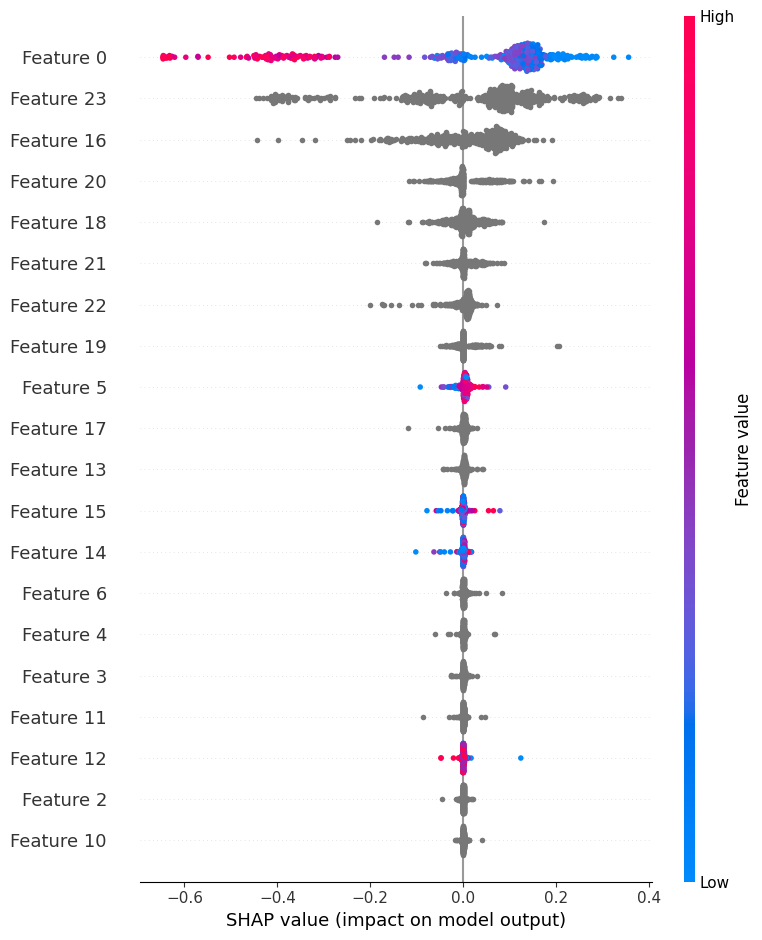

Feature 0: lesion_id
Feature 1: smoke
Feature 2: drink
Feature 3: background_father
Feature 4: background_mother
Feature 5: age
Feature 6: pesticide
Feature 7: gender
Feature 8: skin_cancer_history
Feature 9: cancer_history
Feature 10: has_piped_water
Feature 11: has_sewage_system
Feature 12: fitspatrick
Feature 13: region
Feature 14: diameter_1
Feature 15: diameter_2
Feature 16: diagnostic
Feature 17: itch
Feature 18: grew
Feature 19: hurt
Feature 20: changed
Feature 21: bleed
Feature 22: elevation
Feature 23: img_id


In [ ]:
import shap

# SHAP values for tabular model
explainer = shap.Explainer(rf.predict, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test)




# Print all feature names in their indexed order
for i, col in enumerate(X_train.columns):
    print(f"Feature {i}: {col}")



In [ ]:
# Get feature names (before scaling)
print("Original Feature Names:", df.columns.tolist())

# If using a DataFrame after preprocessing
print("Processed Feature Names:", X_train.columns.tolist())


Original Feature Names: ['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father', 'background_mother', 'age', 'pesticide', 'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system', 'fitspatrick', 'region', 'diameter_1', 'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation', 'img_id', 'biopsed']
Processed Feature Names: ['lesion_id', 'smoke', 'drink', 'background_father', 'background_mother', 'age', 'pesticide', 'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system', 'fitspatrick', 'region', 'diameter_1', 'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation', 'img_id']


In [ ]:
# Print all feature names in their indexed order
for i, col in enumerate(X_train.columns):
    print(f"Feature {i}: {col}")


Feature 0: lesion_id
Feature 1: smoke
Feature 2: drink
Feature 3: background_father
Feature 4: background_mother
Feature 5: age
Feature 6: pesticide
Feature 7: gender
Feature 8: skin_cancer_history
Feature 9: cancer_history
Feature 10: has_piped_water
Feature 11: has_sewage_system
Feature 12: fitspatrick
Feature 13: region
Feature 14: diameter_1
Feature 15: diameter_2
Feature 16: diagnostic
Feature 17: itch
Feature 18: grew
Feature 19: hurt
Feature 20: changed
Feature 21: bleed
Feature 22: elevation
Feature 23: img_id


In [ ]:
import torch.nn.functional as F

def get_softmax_confidence(model, tabular_data, image_data):
    model.eval()
    with torch.no_grad():
        # Ensure both tensors have the same batch size
        min_batch_size = min(tabular_data.shape[0], image_data.shape[0])
        tabular_data = tabular_data[:min_batch_size]  # Slice tabular_data
        image_data = image_data[:min_batch_size]  # Slice image_data

        outputs = model(tabular_data, image_data)
        probabilities = F.softmax(outputs, dim=1)
        confidence, predictions = torch.max(probabilities, dim=1)
    return confidence.cpu().numpy(), predictions.cpu().numpy()

# Example usage:
# Assuming X_test_scaled_tensor and X_test_images_tensor are defined and have correct shapes
# Ensure they have the same batch size or adjust slicing accordingly
confidences, preds = get_softmax_confidence(joint_model, X_test_scaled_tensor, X_test_images_tensor)
print("Mean Confidence:", confidences.mean())  # Higher is better

Mean Confidence: 0.55946803


In [ ]:
# 📦 Install dependencies output came
!pip install -q opencv-python-headless pandas joblib

# 📚 Imports
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import files
import joblib  # Correct import for joblib
from tensorflow.keras.models import load_model

# Step 1: Upload CSV
print("📤 Please upload your CSV file (e.g., metadata.csv)")
csv_upload = files.upload()

# Get CSV path
csv_path = list(csv_upload.keys())[0]
print(f"✅ CSV Uploaded: {csv_path}")

# Read and display CSV
df = pd.read_csv(csv_path)
print("\n📋 Patient Information:")
display(df.head())  # Show first few rows

# Step 2: Upload Image
print("\n📤 Now upload an image file (e.g., lesion.jpg)")
img_upload = files.upload()

# Get image path
img_path = list(img_upload.keys())[0]
print(f"✅ Image Uploaded: {img_path}")

try:
    # Step 3: Load and preprocess the image
    print("🔄 Loading and preprocessing image...")
    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found or unreadable: {img_path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (456, 456))  # Resize to the required size
    img_normalized = img_resized / 255.0  # Normalize the pixel values

    # 🖼 Display the image
    plt.figure(figsize=(6,6))
    plt.imshow(img_normalized)
    plt.title("Uploaded Image")
    plt.axis("off")
    plt.show()

    # ** Feature extraction: Flatten the image to 24 features (adjust if necessary) **
    img_flattened = img_normalized.flatten()[:24]  # Example, take only the first 24 features

    # Check if the flattened image has the right number of features (24)
    if img_flattened.shape[0] != 24:
        raise ValueError(f"Feature shape mismatch, expected 24, but got {img_flattened.shape[0]}.")

    # ** Reshape the image to the expected format for the classifier **
    img_array = np.expand_dims(img_flattened, axis=0)  # Shape (1, 24)

    # Step 4: Load pre-trained XGBoost model (no upload prompt)
    model_path = 'model_xgb.pkl'
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"❌ Model file not found at: {model_path}")
    print(f"✅ Using pre-defined model: {model_path}")

    model = joblib.load(model_path)  # Load the XGBoost model using joblib

    # Step 5: Predict using the model
    print("🔍 Making prediction...")
    preds = model.predict_proba(img_array)  # Use predict_proba to get probabilities

    # Get the predicted probability of the most likely class
    top_prob = np.max(preds)  # The highest probability value
    top_idx = np.argmax(preds)  # The index of the predicted class

    # Step 6: Define categories and cancer status
    CATEGORIES = [
        "Basal Cell Carcinoma (BCC)",
        "Squamous Cell Carcinoma (SCC)",
        "Melanoma (MEL)",
        "Actinic Keratosis (ACK)",
        "Melanocytic Nevus (NEV)",
        "Seborrheic Keratosis (SEK)"
    ]
    CATEGORIES_CANCEROUS_STATUS = {
        "Basal Cell Carcinoma (BCC)": "Cancerous",
        "Squamous Cell Carcinoma (SCC)": "Cancerous",
        "Melanoma (MEL)": "Cancerous",
        "Actinic Keratosis (ACK)": "Cancerous",
        "Melanocytic Nevus (NEV)": "Non-cancerous",
        "Seborrheic Keratosis (SEK)": "Non-cancerous"
    }

    # Step 7: Final prediction
    top_label = CATEGORIES[top_idx]
    top_status = CATEGORIES_CANCEROUS_STATUS[top_label]

    print("\n✅ Final Prediction:")
    print(f" - Predicted Label: {top_label}")
    print(f" - Probability: {top_prob:.4f}")  # Display the predicted probability
    print(f" - Cancer Status: {top_status}")

except Exception as e:
    print(f"❌ Error: {e}")